In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.rcParams['figure.figsize'] = (10, 5)
import pandas as pd
import math as m
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error, accuracy_score

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor  # Use XGBClassifier for classification tasks

In [2]:
data = "processed_dataset.csv"

DATA17 = "data/raw/Onsite-MetMast-SCADA-data-2017.xlsx"
DATAScada17 = "data/raw/Wind-Turbine-SCADA-signals-2017_0.xlsx"

data17 = pd.read_excel(DATA17, engine='openpyxl')
datascada17= pd.read_excel(DATAScada17, engine="openpyxl")

merged_df17 = pd.merge(datascada17, data17, on="Timestamp", how="inner")

In [3]:
#merged_df17.to_csv()

In [4]:
merged_df = pd.read_csv(data)

In [5]:
merged_df

,Unnamed: 0,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,...,Pressure_Avg_Freq,airdensity,p_wind,cp_actual,tsr,timestamp,cp_lambdamodel,cp_difference,cp_xgboost,p_xgboost
0,3,T07,2016-01-08 23:10:00+00:00,1654.7,1247.6,1480.6,106.6,46,71,71,...,406,1.203715,1313.352860,0.478165,8.818899,2016-01-08 23:10:00+00:00,(0.3340752426476843-6.212704716339263e-08j),0.144090,NaN,NaN
1,5,T07,2016-04-19 12:20:00+00:00,1766.4,1591.8,1681.7,26.1,66,124,122,...,405,1.206663,7862.501976,0.254067,5.528708,2016-04-19 12:20:00+00:00,(0.37602658252117527+0j),-0.121960,NaN,NaN
2,11,T07,2016-04-19 12:30:00+00:00,1777.7,1562.6,1675.3,31.3,67,124,123,...,405,1.206663,6969.940919,0.278109,5.716669,2016-04-19 12:30:00+00:00,(0.3923889001982575+0j),-0.114280,NaN,NaN
3,12,T07,2016-01-08 23:50:00+00:00,1667.5,1277.4,1481.3,119.1,46,73,72,...,405,1.202518,1427.752320,0.483487,8.573930,2016-01-08 23:50:00+00:00,(0.35888034851899103-5.853230212509341e-08j),0.124607,NaN,NaN
4,16,T07,2016-04-19 12:40:00+00:00,1749.1,1585.4,1667.3,27.0,67,123,122,...,405,1.210836,4851.993937,0.374650,6.457718,2016-04-19 12:40:00+00:00,(0.4341989273784258+0j),-0.059549,0.373801,1813.678416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35765,207873,T07,2016-10-24 20:50:00+00:00,1288.9,1229.8,1249.2,8.6,39,56,56,...,402,1.186701,191.209805,0.325297,14.137167,2016-10-24 20:50:00+00:00,0j,0.325297,NaN,NaN
35766,207883,T07,2016-07-01 11:10:00+00:00,1309.1,1213.9,1253.5,15.3,44,61,61,...,410,1.184099,259.599187,0.318183,12.757931,2016-07-01 11:10:00+00:00,0j,0.318183,NaN,NaN
35767,207884,T07,2016-07-11 00:50:00+00:00,1680.9,1439.7,1595.4,55.5,50,74,74,...,407,1.168782,1833.067741,0.463322,8.410720,2016-07-11 00:50:00+00:00,(0.37398769636312906-6.884959428723044e-08j),0.089334,NaN,NaN
35768,207888,T07,2016-10-14 12:50:00+00:00,1337.3,1184.0,1262.5,20.1,42,64,64,...,403,1.191937,393.650426,0.376476,11.229523,2016-10-14 12:50:00+00:00,0j,0.376476,NaN,NaN


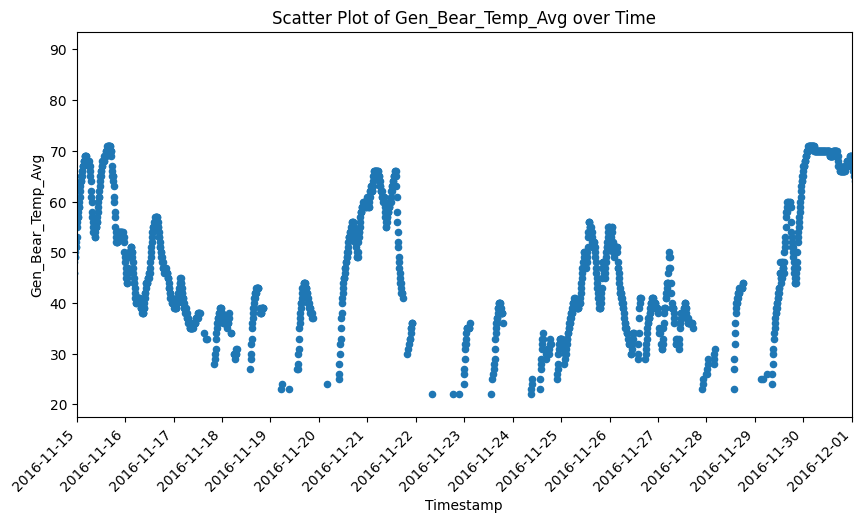

In [6]:
# plotting some data to look for outliers and anomalties in the data itself. Visualize the data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#for i in merged_df:
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

ax = merged_df.plot.scatter(x="Timestamp", y="Gen_Bear_Temp_Avg")

# Customize the format of the timestamp on the x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optionally, set the locator for more control over tick placement
ax.xaxis.set_major_locator(mdates.DayLocator())  # You can adjust the locator based on your data frequency

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
#Define interval for data
plt.xlim(pd.Timestamp('2016-11-15'), pd.Timestamp('2016-12-01'))

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Gen_Bear_Temp_Avg')
plt.title('Scatter Plot of Gen_Bear_Temp_Avg over Time')

# Show the plot
plt.show()


In [7]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# Step 2: Specify the feature columns and the target variable
feature_columns = ["Gen_Phase1_Temp_Avg", "Gen_RPM_Avg", "Avg_Windspeed1", "Nac_Temp_Avg", "Avg_Humidity"]  # Features
target_column = 'Gen_Bear_Temp_Avg'  # Target variable

# Step 3: Prepare the training data from merged_df
X_train = merged_df[feature_columns]  # Feature set for training
y_train = merged_df[target_column]   # Target variable for training

# Step 4: Prepare the prediction data from merged_df17
X_test = merged_df17[feature_columns]  # Feature set for predictions

# Step 5: Initialize the XGBoost model
model = XGBRegressor()  # Use XGBClassifier() if it's a classification task

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions on the merged_df17 dataset
predictions = model.predict(X_test)

# Step 8: Evaluate the model on merged_df (Optional)
# This evaluation is only for the training dataset, not merged_df17
if isinstance(y_train, pd.Series) and y_train.nunique() <= 2:
    # If the target variable has two unique values, treat it as a classification problem
    train_predictions = model.predict(X_train)
    accuracy = accuracy_score(y_train, train_predictions.round())
    print(f'Accuracy on Training Data: {accuracy:.2f}')
else:
    # If it's a regression problem, calculate the mean squared error
    train_predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, train_predictions)
    print(f'Mean Squared Error on Training Data: {mse:.2f}')

# Step 9: Store predictions in merged_df17
merged_df17["xgboost_pred_2017"] = predictions


Mean Squared Error on Training Data: 1.44


In [24]:
merged_df_filtered17_sorted

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,combination_23,combination_24,combination_25,combination_26,combination_27,combination_28,combination_29,combination_30,combination_31,combination_32
87612,T06,2017-01-01 00:00:00+00:00,1464.0,1236.3,1318.6,52.4,39.0,54,56,56,...,1471.5,1473.5,1469.5,1471.5,1471.5,1473.5,1471.5,1473.5,1473.5,1475.5
87613,T11,2017-01-01 00:00:00+00:00,1679.5,1377.7,1596.9,68.6,41.0,62,62,62,...,1757.8,1759.8,1755.8,1757.8,1757.8,1759.8,1757.8,1759.8,1759.8,1761.8
87614,T01,2017-01-01 00:00:00+00:00,1460.9,1239.2,1313.7,47.9,36.0,57,57,57,...,1469.6,1471.6,1467.6,1469.6,1469.6,1471.6,1469.6,1471.6,1471.6,1473.6
87615,T07,2017-01-01 00:00:00+00:00,1513.4,1255.3,1336.5,47.6,36.0,58,58,58,...,1494.4,1496.4,1492.4,1494.4,1494.4,1496.4,1494.4,1496.4,1496.4,1498.4
37433,T07,2017-01-01 00:10:00+00:00,1485.4,1243.1,1307.9,34.7,36.0,58,58,58,...,1465.5,1467.5,1463.5,1465.5,1465.5,1467.5,1465.5,1467.5,1467.5,1469.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,T01,2017-12-31 23:40:00+00:00,1259.5,1239.8,1249.9,3.2,39.0,60,59,59,...,1429.5,1431.5,1427.5,1429.5,1429.5,1431.5,1429.5,1431.5,1431.5,1433.5
65840,T01,2017-12-31 23:50:00+00:00,1273.1,1239.8,1250.7,4.7,39.0,59,59,59,...,1427.3,1429.3,1425.3,1427.3,1427.3,1429.3,1427.3,1429.3,1429.3,1431.3
65841,T11,2017-12-31 23:50:00+00:00,1320.5,1216.8,1262.0,20.6,42.0,56,58,57,...,1433.6,1435.6,1431.6,1433.6,1433.6,1435.6,1433.6,1435.6,1435.6,1437.6
65842,T06,2017-12-31 23:50:00+00:00,1270.8,1229.6,1249.4,6.6,42.0,56,58,58,...,1421.0,1423.0,1419.0,1421.0,1421.0,1423.0,1421.0,1423.0,1423.0,1425.0


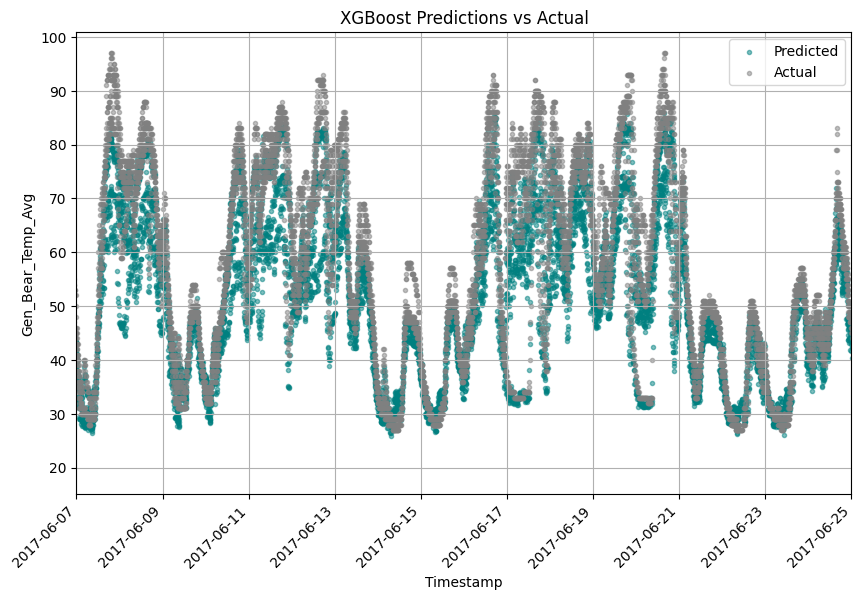

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Timestamp column is in datetime format
merged_df17["Timestamp"] = pd.to_datetime(merged_df17["Timestamp"])

# Sort merged_df17 by "Timestamp" for better visualization
merged_df_filtered17_sorted = merged_df17.sort_values(by="Timestamp")

plt.figure(figsize=(10, 6))

# Scatter plot for predicted values
plt.scatter(
    merged_df_filtered17_sorted["Timestamp"],  # Sorted timestamps
    merged_df_filtered17_sorted["xgboost_pred_2017"],  # Predictions stored in 'cp_xgboost'
    c='teal', alpha=0.5, label='Predicted', marker="."
)

# Scatter plot for actual values (y_test)
plt.scatter(
    merged_df_filtered17_sorted["Timestamp"],  # Sorted timestamps
    merged_df_filtered17_sorted[target_column],  # Actual target values
    c='grey', alpha=0.5, label='Actual', marker=".", 
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Define interval for data (adjust as needed)
plt.xlim(pd.to_datetime('2017-06-07'), pd.to_datetime('2017-06-25'))

plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Timestamp")
plt.ylabel(target_column)
plt.legend()  # Show legend to distinguish between predicted and actual values
plt.grid(True)
plt.show()


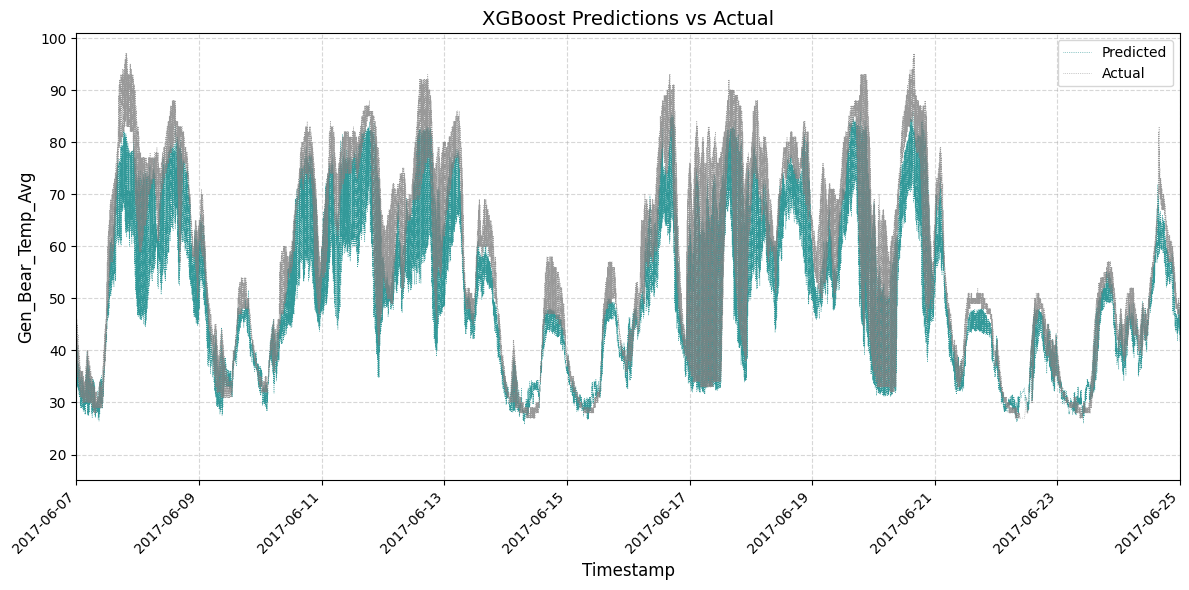

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Timestamp column is in datetime format
merged_df17["Timestamp"] = pd.to_datetime(merged_df17["Timestamp"])

# Sort merged_df17 by "Timestamp" for better visualization
merged_df_filtered17_sorted = merged_df17.sort_values(by="Timestamp")

plt.figure(figsize=(12, 6))

# Line plot for predicted values
plt.plot(
    merged_df_filtered17_sorted["Timestamp"],  # Sorted timestamps
    merged_df_filtered17_sorted["xgboost_pred_2017"],  # Predictions
    color='teal', alpha=0.8, label='Predicted', linestyle=':', linewidth=0.5
)

# Line plot for actual values
plt.plot(
    merged_df_filtered17_sorted["Timestamp"],  # Sorted timestamps
    merged_df_filtered17_sorted[target_column],  # Actual target values
    color='grey', alpha=0.8, label='Actual', linestyle=':', linewidth=0.5
)

# Highlight x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Define interval for x-axis (adjust as needed)
plt.xlim(pd.to_datetime('2017-06-07'), pd.to_datetime('2017-06-25'))

# Title and labels
plt.title("XGBoost Predictions vs Actual", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel(target_column, fontsize=12)

# Legend and grid for clarity
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


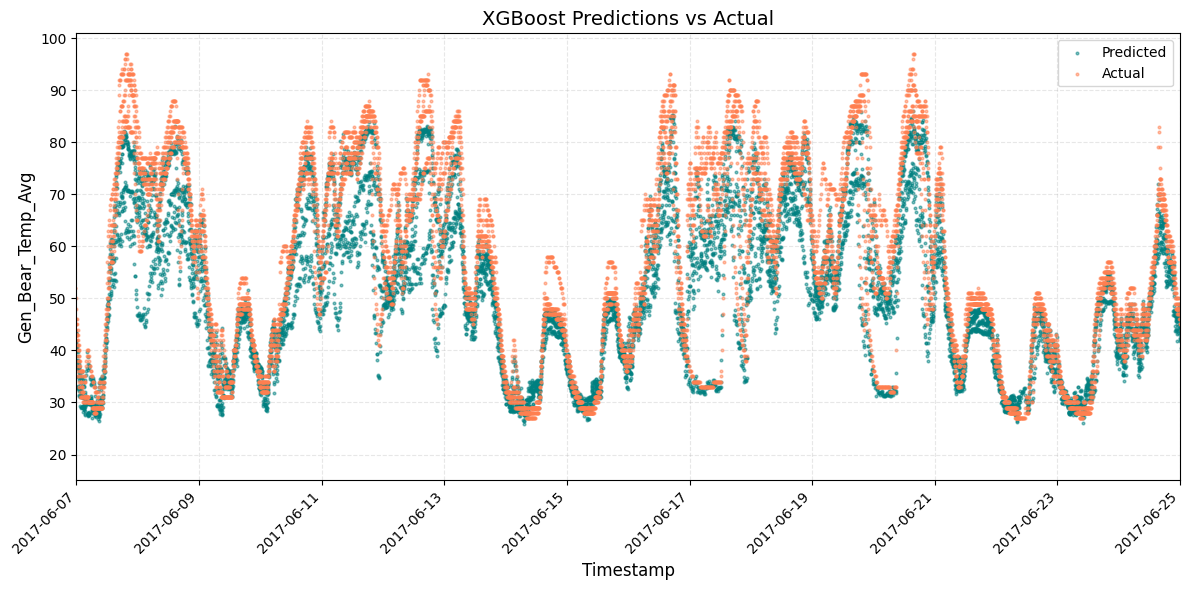

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Timestamp column is in datetime format
merged_df17["Timestamp"] = pd.to_datetime(merged_df17["Timestamp"])

# Sort merged_df17 by "Timestamp" for better visualization
merged_df_filtered17_sorted = merged_df17.sort_values(by="Timestamp")

plt.figure(figsize=(12, 6))

# Scatter plot for predicted values
plt.scatter(
    merged_df_filtered17_sorted["Timestamp"],  # Sorted timestamps
    merged_df_filtered17_sorted["xgboost_pred_2017"],  # Predictions
    c='teal', alpha=0.5, label='Predicted', marker='.', s=15  # Adjusted size and transparency
)

# Scatter plot for actual values
plt.scatter(
    merged_df_filtered17_sorted["Timestamp"],  # Sorted timestamps
    merged_df_filtered17_sorted[target_column],  # Actual target values
    c='coral', alpha=0.5, label='Actual', marker='.', s=15  # Different marker and transparency
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Define interval for x-axis (adjust as needed)
plt.xlim(pd.to_datetime('2017-06-07'), pd.to_datetime('2017-06-25'))

# Title and labels
plt.title("XGBoost Predictions vs Actual", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel(target_column, fontsize=12)

# Legend and grid for clarity
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)  # Subtle grid

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [11]:
merged_df_filtered17_sorted

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq,xgboost_pred_2017
87612,T06,2017-01-01 00:00:00+00:00,1464.0,1236.3,1318.6,52.4,39.0,54,56,56,...,0.0499,0.24,1,0,0,600,156,139,420,35.391739
87613,T11,2017-01-01 00:00:00+00:00,1679.5,1377.7,1596.9,68.6,41.0,62,62,62,...,0.0499,0.24,1,0,0,600,156,139,420,38.559090
87614,T01,2017-01-01 00:00:00+00:00,1460.9,1239.2,1313.7,47.9,36.0,57,57,57,...,0.0499,0.24,1,0,0,600,156,139,420,36.951130
87615,T07,2017-01-01 00:00:00+00:00,1513.4,1255.3,1336.5,47.6,36.0,58,58,58,...,0.0499,0.24,1,0,0,600,156,139,420,37.856892
37433,T07,2017-01-01 00:10:00+00:00,1485.4,1243.1,1307.9,34.7,36.0,58,58,58,...,0.0499,0.24,1,0,0,600,148,141,420,37.796055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,T01,2017-12-31 23:40:00+00:00,1259.5,1239.8,1249.9,3.2,39.0,60,59,59,...,0.0499,0.24,1,0,0,600,128,126,425,38.944298
65840,T01,2017-12-31 23:50:00+00:00,1273.1,1239.8,1250.7,4.7,39.0,59,59,59,...,0.0499,0.24,1,0,0,600,129,127,425,38.309025
65841,T11,2017-12-31 23:50:00+00:00,1320.5,1216.8,1262.0,20.6,42.0,56,58,57,...,0.0499,0.24,1,0,0,600,129,127,425,36.376549
65842,T06,2017-12-31 23:50:00+00:00,1270.8,1229.6,1249.4,6.6,42.0,56,58,58,...,0.0499,0.24,1,0,0,600,129,127,425,36.313141


In [12]:
merged_df_filtered17_sorted

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Anemometer2_Freq,Anemometer2_Offset,Anemometer2_CorrGain,Anemometer2_CorrOffset,DistanceAirPress,AirRessureSensorZeroOffset,Anemometer1_Avg_Freq,Anemometer2_Avg_Freq,Pressure_Avg_Freq,xgboost_pred_2017
87612,T06,2017-01-01 00:00:00+00:00,1464.0,1236.3,1318.6,52.4,39.0,54,56,56,...,0.0499,0.24,1,0,0,600,156,139,420,35.391739
87613,T11,2017-01-01 00:00:00+00:00,1679.5,1377.7,1596.9,68.6,41.0,62,62,62,...,0.0499,0.24,1,0,0,600,156,139,420,38.559090
87614,T01,2017-01-01 00:00:00+00:00,1460.9,1239.2,1313.7,47.9,36.0,57,57,57,...,0.0499,0.24,1,0,0,600,156,139,420,36.951130
87615,T07,2017-01-01 00:00:00+00:00,1513.4,1255.3,1336.5,47.6,36.0,58,58,58,...,0.0499,0.24,1,0,0,600,156,139,420,37.856892
37433,T07,2017-01-01 00:10:00+00:00,1485.4,1243.1,1307.9,34.7,36.0,58,58,58,...,0.0499,0.24,1,0,0,600,148,141,420,37.796055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,T01,2017-12-31 23:40:00+00:00,1259.5,1239.8,1249.9,3.2,39.0,60,59,59,...,0.0499,0.24,1,0,0,600,128,126,425,38.944298
65840,T01,2017-12-31 23:50:00+00:00,1273.1,1239.8,1250.7,4.7,39.0,59,59,59,...,0.0499,0.24,1,0,0,600,129,127,425,38.309025
65841,T11,2017-12-31 23:50:00+00:00,1320.5,1216.8,1262.0,20.6,42.0,56,58,57,...,0.0499,0.24,1,0,0,600,129,127,425,36.376549
65842,T06,2017-12-31 23:50:00+00:00,1270.8,1229.6,1249.4,6.6,42.0,56,58,58,...,0.0499,0.24,1,0,0,600,129,127,425,36.313141


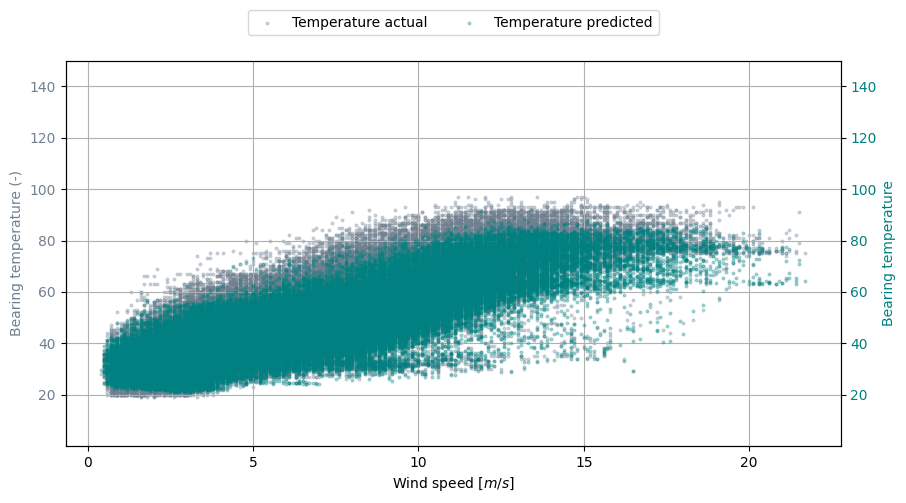

In [13]:
# Adjusted color scheme with burgundy and muted green
fig, ax1 = plt.subplots()  # Create a figure and axis

# Plotting the actual Cp values on the primary y-axis with burgundy
ax1.scatter(merged_df_filtered17_sorted["Amb_WindSpeed_Avg"], merged_df_filtered17_sorted["Gen_Bear_Temp_Avg"], color='slategrey', label='Temperature actual', alpha=0.3, marker='.', s=15)
ax1.set_xlabel('Wind speed [$m/s$]')  # x-axis label
ax1.set_ylabel('Bearing temperature (-)', color='slategrey')  # Primary y-axis label color
ax1.tick_params(axis='y', labelcolor='slategrey')  # Primary y-axis label tick color
ax1.grid()
ax1.set_ylim(0.1, 150)  # Set y-limits for Cp values

# Create a secondary y-axis with a muted green color
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.scatter(merged_df_filtered17_sorted["Amb_WindSpeed_Avg"], merged_df_filtered17_sorted["xgboost_pred_2017"], color='teal', label='Temperature predicted', alpha=0.3, marker='.', s=15)  # Muted olive green color
ax2.set_ylabel('Bearing temperature', color='teal')  # Secondary y-axis label color
ax2.tick_params(axis='y', labelcolor='teal')  # Secondary y-axis label tick color
ax2.set_ylim(0.1, 150)

# Optional: Add legends for both y-axes with subtle colors
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), bbox_transform=ax1.transAxes, ncol=2)

# Show the plot
plt.show()

# Intervals:

In [14]:
humidity_interval = [-1,1]
Gen_Phase1_Temp_interval = [-1,1] 
Gen_RPM_interval = [-1,1]
Windspeed1_interval = [-1,1]
Nac_Temp_interval = [-1,1]

In [15]:
# Create and calculate 'max' columns using the average values and max of intervals
merged_df_filtered17_sorted["max_Humidity"] = merged_df_filtered17_sorted["Avg_Humidity"] + max(humidity_interval)
merged_df_filtered17_sorted["max_Gen_Phase1_Temp"] = merged_df_filtered17_sorted["Gen_Phase1_Temp_Avg"] + max(Gen_Phase1_Temp_interval)
merged_df_filtered17_sorted["max_Gen_RPM"] = merged_df_filtered17_sorted["Gen_RPM_Avg"] + max(Gen_RPM_interval)
merged_df_filtered17_sorted["max_Windspeed1"] = merged_df_filtered17_sorted["Avg_Windspeed1"] + max(Windspeed1_interval)
merged_df_filtered17_sorted["max_Nac_Temp"] = merged_df_filtered17_sorted["Nac_Temp_Avg"] + max(Nac_Temp_interval)

# Create and calculate 'min' columns using the average values and min of intervals
merged_df_filtered17_sorted["min_Humidity"] = merged_df_filtered17_sorted["Avg_Humidity"] + min(humidity_interval)
merged_df_filtered17_sorted["min_Gen_Phase1_Temp"] = merged_df_filtered17_sorted["Gen_Phase1_Temp_Avg"] + min(Gen_Phase1_Temp_interval)
merged_df_filtered17_sorted["min_Gen_RPM"] = merged_df_filtered17_sorted["Gen_RPM_Avg"] + min(Gen_RPM_interval)
merged_df_filtered17_sorted["min_Windspeed1"] = merged_df_filtered17_sorted["Avg_Windspeed1"] + min(Windspeed1_interval)
merged_df_filtered17_sorted["min_Nac_Temp"] = merged_df_filtered17_sorted["Nac_Temp_Avg"] + min(Nac_Temp_interval)


In [16]:
"""# Lists of the interval names marked with "Min" and "Max"
min_names = [
    "Avg_Windspeed1", "Gen_Phase1_Temp_Avg", "Avg_Humidity",  # Combination 1, 2, 3, 4
    "Gen_RPM_Avg", "Nac_Temp_Avg"  # Continue this list for other combinations
]

max_names = [
    "Avg_Windspeed1", "Gen_Phase1_Temp_Avg", "Avg_Humidity",  # Combination 5, 6, 7, 8
    "Gen_RPM_Avg", "Nac_Temp_Avg"  # Continue this list for other combinations
]
"""

'# Lists of the interval names marked with "Min" and "Max"\nmin_names = [\n    "Avg_Windspeed1", "Gen_Phase1_Temp_Avg", "Avg_Humidity",  # Combination 1, 2, 3, 4\n    "Gen_RPM_Avg", "Nac_Temp_Avg"  # Continue this list for other combinations\n]\n\nmax_names = [\n    "Avg_Windspeed1", "Gen_Phase1_Temp_Avg", "Avg_Humidity",  # Combination 5, 6, 7, 8\n    "Gen_RPM_Avg", "Nac_Temp_Avg"  # Continue this list for other combinations\n]\n'

In [17]:
"""# Define the combinations as per the table, mapping 'Min' and 'Max' for each feature
combination_configs = {
    1: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    2: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Max"},
    3: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    4: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},
    5: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    6: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},
    7: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    8: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},
    9: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    10: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},
    11: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    12: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},
    13: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    14: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},
    15: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},
    16: {"Avg_Windspeed1": "Max", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Max"}
}
"""

'# Define the combinations as per the table, mapping \'Min\' and \'Max\' for each feature\ncombination_configs = {\n    1: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},\n    2: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Max"},\n    3: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},\n    4: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Min", "Avg_Humidity": "Max", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},\n    5: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Min", "Nac_Temp_Avg": "Min"},\n    6: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Min", "Gen_RPM_Avg": "Max", "Nac_Temp_Avg": "Min"},\n    7: {"Avg_Windspeed1": "Min", "Gen_Phase1_Temp_Avg": "Max", "Avg_Humidity": "Max", 

In [18]:
"""import pandas as pd
from xgboost import XGBRegressor

# Define the feature intervals
humidity_interval = [-1, 1]
Gen_Phase1_Temp_interval = [-1, 1]
Gen_RPM_interval = [-1, 1]
Windspeed1_interval = [-1, 1]
Nac_Temp_interval = [-1, 1]

# Create 'max' and 'min' columns for each feature based on the intervals
merged_df_filtered17_sorted["max_Humidity"] = merged_df_filtered17_sorted["Avg_Humidity"] + max(humidity_interval)
merged_df_filtered17_sorted["max_Gen_Phase1_Temp"] = merged_df_filtered17_sorted["Gen_Phase1_Temp_Avg"] + max(Gen_Phase1_Temp_interval)
merged_df_filtered17_sorted["max_Gen_RPM"] = merged_df_filtered17_sorted["Gen_RPM_Avg"] + max(Gen_RPM_interval)
merged_df_filtered17_sorted["max_Windspeed1"] = merged_df_filtered17_sorted["Avg_Windspeed1"] + max(Windspeed1_interval)
merged_df_filtered17_sorted["max_Nac_Temp"] = merged_df_filtered17_sorted["Nac_Temp_Avg"] + max(Nac_Temp_interval)

# Create 'min' columns for each feature based on the intervals
merged_df_filtered17_sorted["min_Humidity"] = merged_df_filtered17_sorted["Avg_Humidity"] + min(humidity_interval)
merged_df_filtered17_sorted["min_Gen_Phase1_Temp"] = merged_df_filtered17_sorted["Gen_Phase1_Temp_Avg"] + min(Gen_Phase1_Temp_interval)
merged_df_filtered17_sorted["min_Gen_RPM"] = merged_df_filtered17_sorted["Gen_RPM_Avg"] + min(Gen_RPM_interval)
merged_df_filtered17_sorted["min_Windspeed1"] = merged_df_filtered17_sorted["Avg_Windspeed1"] + min(Windspeed1_interval)
merged_df_filtered17_sorted["min_Nac_Temp"] = merged_df_filtered17_sorted["Nac_Temp_Avg"] + min(Nac_Temp_interval)

# Define the feature columns
feature_columns = ["Gen_Phase1_Temp_Avg", "Gen_RPM_Avg", "Avg_Windspeed1", "Nac_Temp_Avg", "Avg_Humidity"]

# Load your trained model (already assumed to be available as `model` in the notebook)
# Example: model = XGBRegressor()
# model.fit(X_train, y_train)  # Model is already trained

# Generate the combinations of 'min' and 'max' for each feature
combinations = [
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "min_Nac_Temp", "min_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "min_Nac_Temp", "max_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "max_Nac_Temp", "min_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "max_Nac_Temp", "max_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "max_Gen_RPM", "min_Nac_Temp", "min_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "max_Gen_RPM", "min_Nac_Temp", "max_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "max_Gen_RPM", "max_Nac_Temp", "min_Humidity"),
    ("min_Windspeed1", "min_Gen_Phase1_Temp", "max_Gen_RPM", "max_Nac_Temp", "max_Humidity"),
    ("min_Windspeed1", "max_Gen_Phase1_Temp", "min_Gen_RPM", "min_Nac_Temp", "min_Humidity"),
    ("min_Windspeed1", "max_Gen_Phase1_Temp", "min_Gen_RPM", "min_Nac_Temp", "max_Humidity"),
    ("min_Windspeed1", "max_Gen_Phase1_Temp", "min_Gen_RPM", "max_Nac_Temp", "min_Humidity"),
    ("min_Windspeed1", "max_Gen_Phase1_Temp", "min_Gen_RPM", "max_Nac_Temp", "max_Humidity"),
    ("max_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "min_Nac_Temp", "min_Humidity"),
    ("max_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "min_Nac_Temp", "max_Humidity"),
    ("max_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "max_Nac_Temp", "min_Humidity"),
    ("max_Windspeed1", "min_Gen_Phase1_Temp", "min_Gen_RPM", "max_Nac_Temp", "max_Humidity"),
]

# Generate predictions for each combination
for i, combination in enumerate(combinations, 1):
    # Apply the combination configuration
    temp_df = merged_df_filtered17_sorted.copy()
    for feature, value in zip(feature_columns, combination):
        temp_df[feature] = temp_df[value]  # Apply the 'min' or 'max' value for each feature
    
    # Predict the target using the model for this combination
    merged_df_filtered17_sorted[f"combination_{i}"] = model.predict(temp_df[feature_columns])

# Now, merged_df_filtered17_sorted will have columns 'combination_1', 'combination_2', ..., 'combination_16'
"""

'import pandas as pd\nfrom xgboost import XGBRegressor\n\n# Define the feature intervals\nhumidity_interval = [-1, 1]\nGen_Phase1_Temp_interval = [-1, 1]\nGen_RPM_interval = [-1, 1]\nWindspeed1_interval = [-1, 1]\nNac_Temp_interval = [-1, 1]\n\n# Create \'max\' and \'min\' columns for each feature based on the intervals\nmerged_df_filtered17_sorted["max_Humidity"] = merged_df_filtered17_sorted["Avg_Humidity"] + max(humidity_interval)\nmerged_df_filtered17_sorted["max_Gen_Phase1_Temp"] = merged_df_filtered17_sorted["Gen_Phase1_Temp_Avg"] + max(Gen_Phase1_Temp_interval)\nmerged_df_filtered17_sorted["max_Gen_RPM"] = merged_df_filtered17_sorted["Gen_RPM_Avg"] + max(Gen_RPM_interval)\nmerged_df_filtered17_sorted["max_Windspeed1"] = merged_df_filtered17_sorted["Avg_Windspeed1"] + max(Windspeed1_interval)\nmerged_df_filtered17_sorted["max_Nac_Temp"] = merged_df_filtered17_sorted["Nac_Temp_Avg"] + max(Nac_Temp_interval)\n\n# Create \'min\' columns for each feature based on the intervals\nmerge

In [19]:
# Create a list of the 'min' and 'max' columns
min_columns = ["min_Humidity", "min_Gen_Phase1_Temp", "min_Gen_RPM", "min_Windspeed1", "min_Nac_Temp"]
max_columns = ["max_Humidity", "max_Gen_Phase1_Temp", "max_Gen_RPM", "max_Windspeed1", "max_Nac_Temp"]

# Generate the combinations (2^5 = 32 combinations)
combinations = []
for i in range(32):
    combination = []
    for j in range(5):
        if (i >> j) & 1:
            combination.append(max_columns[j])  # Use max for this feature
        else:
            combination.append(min_columns[j])  # Use min for this feature
    combinations.append(combination)

# Assign the combinations as new columns in the dataframe
for idx, comb in enumerate(combinations, 1):
    combination_name = f"combination_{idx}"
    merged_df_filtered17_sorted[combination_name] = merged_df_filtered17_sorted[comb[0]]  # Start with the first feature
    for feature in comb[1:]:  # Add the rest of the features to the calculation
        merged_df_filtered17_sorted[combination_name] += merged_df_filtered17_sorted[feature]


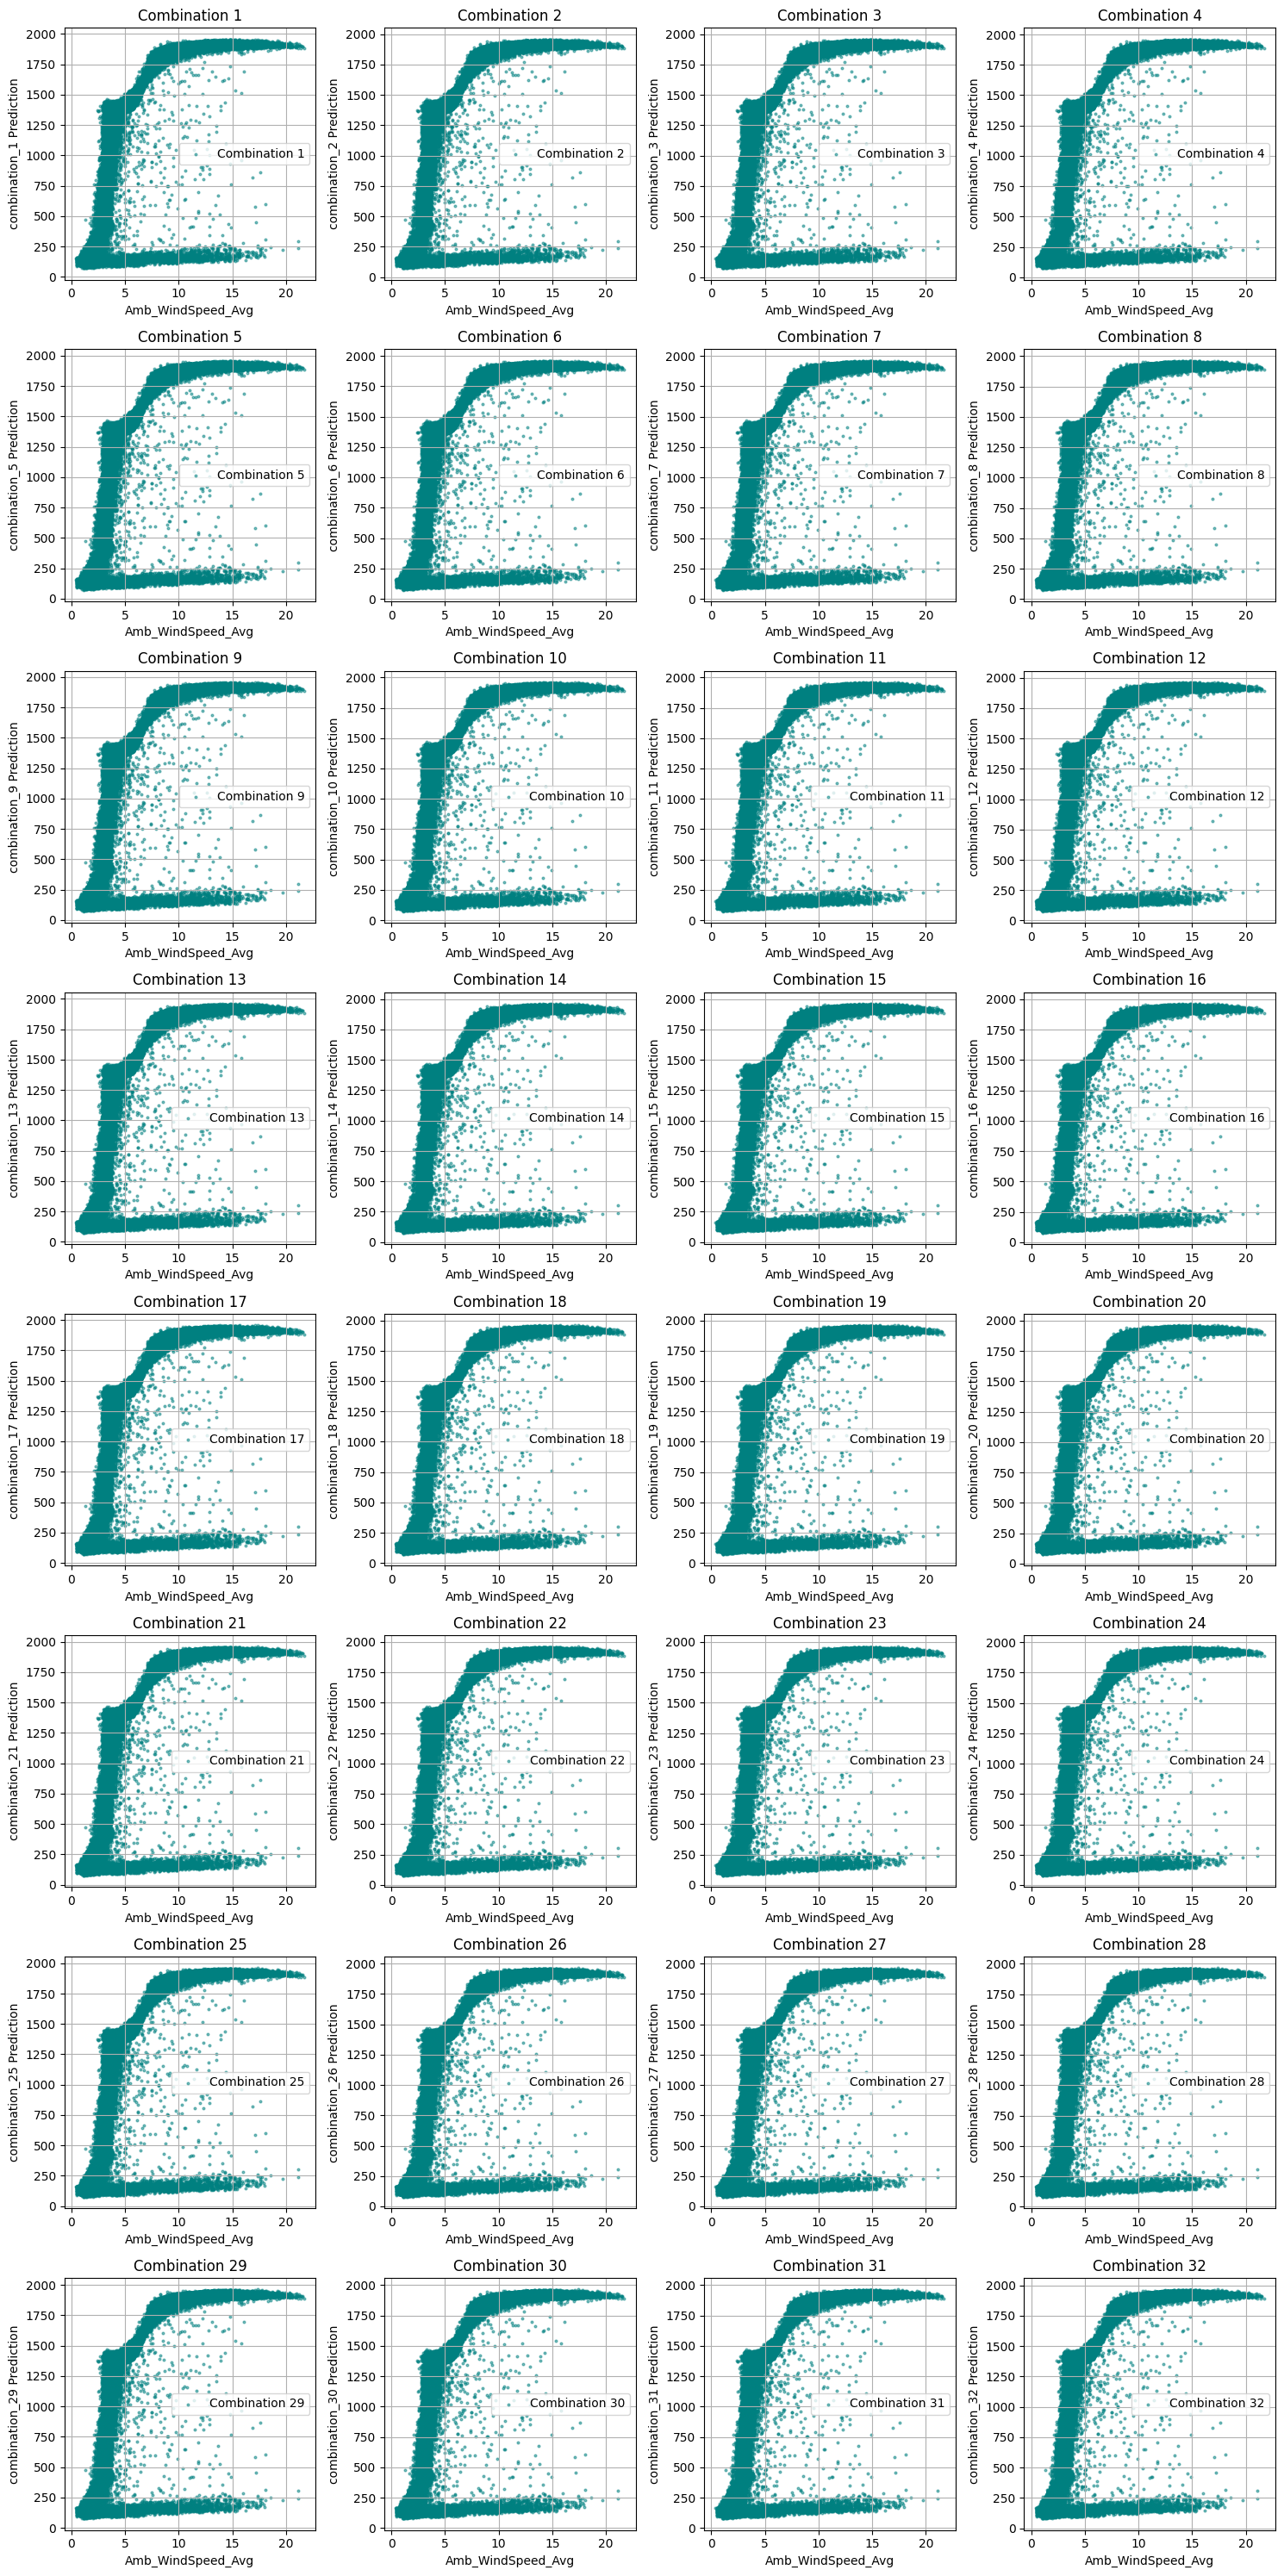

In [23]:
import matplotlib.pyplot as plt

# Number of combinations (32 combinations)
num_combinations = 32

# Set up the plot grid (8x4 grid for 32 subplots)
fig, axes = plt.subplots(8, 4, figsize=(15, 30))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each combination (combination_1, combination_2, ..., combination_32)
for i in range(1, num_combinations + 1):
    # Select the corresponding column name for this combination
    combination_column = f"combination_{i}"
    
    # Scatter plot of Amb_WindSpeed_Avg vs the current combination using matplotlib
    axes[i - 1].scatter(
        merged_df_filtered17_sorted["Amb_WindSpeed_Avg"], 
        merged_df_filtered17_sorted[combination_column], 
        color='teal', marker=".", s=15, alpha=0.5, label=f"Combination {i}"
    )
    
    # Set the title for each subplot
    axes[i - 1].set_title(f"Combination {i}", fontsize=12)
    axes[i - 1].set_xlabel("Amb_WindSpeed_Avg")
    axes[i - 1].set_ylabel(f"{combination_column} Prediction")
    
    # Optionally add grid and legend
    axes[i - 1].grid(True)
    axes[i - 1].legend()

# Adjust the layout
plt.tight_layout()
plt.show()


In [21]:
"""import matplotlib.pyplot as plt

# Number of combinations (16 combinations)
num_combinations = 32

# Set up the plot grid (4x4 grid for 16 subplots)
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each combination (combination_1, combination_2, ..., combination_16)
for i in range(1, num_combinations + 1):
    # Select the corresponding column name for this combination
    combination_column = f"combination_{i}"
    
    # Scatter plot of Amb_WindSpeed_Avg vs the current combination using matplotlib
    axes[i - 1].scatter(
        merged_df_filtered17_sorted["Amb_WindSpeed_Avg"], 
        merged_df_filtered17_sorted[combination_column], 
        color='blue', alpha=0.5, label=f"Combination {i}"
    )
    
    # Set the title for each subplot
    axes[i - 1].set_title(f"Combination {i}", fontsize=12)
    axes[i - 1].set_xlabel("Amb_WindSpeed_Avg")
    axes[i - 1].set_ylabel(f"{combination_column} Prediction")
    
    # Optionally add grid and legend
    axes[i - 1].grid(True)
    axes[i - 1].legend()

# Adjust the layout
plt.tight_layout()
plt.show()
"""

'import matplotlib.pyplot as plt\n\n# Number of combinations (16 combinations)\nnum_combinations = 32\n\n# Set up the plot grid (4x4 grid for 16 subplots)\nfig, axes = plt.subplots(4, 4, figsize=(15, 15))\n\n# Flatten the axes array to make indexing easier\naxes = axes.flatten()\n\n# Loop through each combination (combination_1, combination_2, ..., combination_16)\nfor i in range(1, num_combinations + 1):\n    # Select the corresponding column name for this combination\n    combination_column = f"combination_{i}"\n    \n    # Scatter plot of Amb_WindSpeed_Avg vs the current combination using matplotlib\n    axes[i - 1].scatter(\n        merged_df_filtered17_sorted["Amb_WindSpeed_Avg"], \n        merged_df_filtered17_sorted[combination_column], \n        color=\'blue\', alpha=0.5, label=f"Combination {i}"\n    )\n    \n    # Set the title for each subplot\n    axes[i - 1].set_title(f"Combination {i}", fontsize=12)\n    axes[i - 1].set_xlabel("Amb_WindSpeed_Avg")\n    axes[i - 1].set_yla

In [22]:
"""def apply_combination_and_predict(row, combination_config, intervals_dict):
    """
    This function applies the configuration (Min/Max) to the row's features and makes a prediction.
    """
    # Apply the configuration to the row based on the Min/Max values
    for feature, config in combination_config.items():
        if config == "Min":
            # Set the feature to its minimum value (you should replace this with actual logic)
            row[feature] = row[feature] + min(intervals_dict[feature])  # Adjust based on Min value
        elif config == "Max":
            # Set the feature to its maximum value (you should replace this with actual logic)
            row[feature] = row[feature] + max(intervals_dict[feature])  # Adjust based on Max value
    
    # Now predict using the model
    prediction = model.predict([row[feature_columns]])  # Predict for the current row
    return prediction[0]
"""

IndentationError: unexpected indent (2232314057.py, line 3)

In [ ]:
"""# Example: intervals_dict is assumed to contain the Min and Max values for each feature
intervals_dict = {
    "Avg_Windspeed1": [-1, 1],  # Example: Adjust this with your actual interval values
    "Gen_Phase1_Temp_Avg": [-1, 1],
    "Avg_Humidity": [-1, 1],
    "Gen_RPM_Avg": [-1, 1],
    "Nac_Temp_Avg": [-1, 1]
}

# Iterate over the combination configurations and make predictions
for combination_num, combination_config in combination_configs.items():
    merged_df_filtered17_sorted[f"combination_{combination_num}"] = merged_df_filtered17_sorted.apply(
        lambda row: apply_combination_and_predict(row, combination_config, intervals_dict), axis=1
    )
"""

In [ ]:
"""# Function to apply the 'Min' and 'Max' configurations to the features and make a prediction
def apply_combination_and_predict(row, combination_config):
    # Create a new row based on the combination configuration
    for feature, config in combination_config.items():
        if config == "Min":
            # Here we adjust the feature to its minimum interval (add your logic for Min)
            row[feature] = row[feature] + min(intervals_dict[feature])  # Adjusting based on Min
        elif config == "Max":
            # Adjust the feature to its maximum interval (add your logic for Max)
            row[feature] = row[feature] + max([feature])  # Adjusting based on Max

    # Now predict using the model
    prediction = model.predict([row[feature_columns]])  # Predict for the current row
    return prediction[0]

# Generate predictions for each combination and store them in new columns
for combination_num, combination_config in combination_configs.items():
    merged_df_filtered17_sorted[f"combination_{combination_num}"] = merged_df_filtered17_sorted.apply(
        lambda row: apply_combination_and_predict(row, combination_config), axis=1
    )
"""